# IMDB movie rating analysis using Pandas 

In [1]:
import pandas as pd

In [6]:
movies = pd.read_csv(r"D:\October\9-10-23\Task\Dataset from kaggle\movie.csv")
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [6]:
movies.shape

(27278, 3)

In [7]:
tag = pd.read_csv(r"D:\October\9-10-23\Task\Dataset from kaggle\tag.csv")
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [9]:
tag.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [10]:
tag.shape

(465564, 4)

In [8]:
rating = pd.read_csv(r"D:\October\9-10-23\Task\Dataset from kaggle\rating.csv")
rating.head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [13]:
rating.shape    # data reading in excel is limited
                  # here,we read 2crore rows in python

(20000263, 4)

In [15]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [8]:
tag['timestamp'].str.split(' ', expand=True)

,0,1
0,2009-04-24,18:19:40
1,2013-05-10,01:41:18
2,2013-05-10,01:41:19
3,2013-05-10,01:39:43
4,2013-05-10,01:41:18
...,...,...
465559,2013-01-23,23:29:32
465560,2013-01-23,23:29:38
465561,2013-01-23,23:29:38
465562,2013-01-23,23:29:32


In [9]:
tag[['Date','time']] = tag['timestamp'].str.split(' ', expand=True) # using split function separte the timestamp column

In [10]:
tag.head()

,userId,movieId,tag,timestamp,Date,time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24,18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10,01:41:18
2,65,353,dark hero,2013-05-10 01:41:19,2013-05-10,01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43,2013-05-10,01:39:43
4,65,592,dark hero,2013-05-10 01:41:18,2013-05-10,01:41:18


In [11]:
del tag['timestamp']                     # delete the timestamp column after separating
tag.head()                            

,userId,movieId,tag,Date,time
0,18,4141,Mark Waters,2009-04-24,18:19:40
1,65,208,dark hero,2013-05-10,01:41:18
2,65,353,dark hero,2013-05-10,01:41:19
3,65,521,noir thriller,2013-05-10,01:39:43
4,65,592,dark hero,2013-05-10,01:41:18


In [12]:
tag1 = tag.drop('time', axis=1)       # we can use drop fuction to delete the column

In [13]:
tag1

,userId,movieId,tag,Date
0,18,4141,Mark Waters,2009-04-24
1,65,208,dark hero,2013-05-10
2,65,353,dark hero,2013-05-10
3,65,521,noir thriller,2013-05-10
4,65,592,dark hero,2013-05-10
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23
465560,138446,55999,Jason Bateman,2013-01-23
465561,138446,55999,quirky,2013-01-23
465562,138446,55999,sad,2013-01-23


In [27]:
tag1.columns           

Index(['userId', 'movieId', 'tag', 'Date'], dtype='object')

In [14]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [15]:
rating['timestamp'].str.split(' ', expand=True)
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [14]:
rating[['Date','time']] = rating['timestamp'].str.split(' ',expand=True)
rating.head()

,userId,movieId,rating,timestamp,Date,time
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02,23:53:47
1,1,29,3.5,2005-04-02 23:31:16,2005-04-02,23:31:16
2,1,32,3.5,2005-04-02 23:33:39,2005-04-02,23:33:39
3,1,47,3.5,2005-04-02 23:32:07,2005-04-02,23:32:07
4,1,50,3.5,2005-04-02 23:29:40,2005-04-02,23:29:40


In [15]:
del rating['timestamp']
rating.head()

,userId,movieId,rating,Date,time
0,1,2,3.5,2005-04-02,23:53:47
1,1,29,3.5,2005-04-02,23:31:16
2,1,32,3.5,2005-04-02,23:33:39
3,1,47,3.5,2005-04-02,23:32:07
4,1,50,3.5,2005-04-02,23:29:40


In [16]:
rating1 = rating.drop('time', axis=1)
rating1.head()

,userId,movieId,rating,Date
0,1,2,3.5,2005-04-02
1,1,29,3.5,2005-04-02
2,1,32,3.5,2005-04-02
3,1,47,3.5,2005-04-02
4,1,50,3.5,2005-04-02


In [19]:
rating1.columns

Index(['userId', 'movieId', 'rating', 'Date'], dtype='object')

In [14]:
row_0 = tag1.iloc[0]            # loc function used to find the location of element and iloc given specific index
print(row_0)
print(type(row_0))

userId              18
movieId           4141
tag        Mark Waters
Date        2009-04-24
Name: 0, dtype: object
<class 'pandas.core.series.Series'>


In [15]:
row_0.index          # titles of specific row

Index(['userId', 'movieId', 'tag', 'Date'], dtype='object')

In [16]:
row_0['userId']

18

In [18]:
'rating' in row_0

False

In [19]:
row_0.name

0

In [21]:
row_0 = row_0.rename('first row')                    # set the name
row_0

userId              18
movieId           4141
tag        Mark Waters
Date        2009-04-24
Name: first row, dtype: object

In [22]:
tag1.index

RangeIndex(start=0, stop=465564, step=1)

In [23]:
tag1.columns

Index(['userId', 'movieId', 'tag', 'Date'], dtype='object')

In [25]:
tag1.iloc[[0,10,500]]    # specific arguments

,userId,movieId,tag,Date
0,18,4141,Mark Waters,2009-04-24
10,65,1694,jesus,2013-05-10
500,342,55908,entirely dialogue,2012-01-31


In [29]:
rating1['rating'].describe()       # Static function of rating

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [30]:
rating.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [31]:
rating['rating'].mean()

3.5255285642993797

In [32]:
tag1.head()

,userId,movieId,tag,Date
0,18,4141,Mark Waters,2009-04-24
1,65,208,dark hero,2013-05-10
2,65,353,dark hero,2013-05-10
3,65,521,noir thriller,2013-05-10
4,65,592,dark hero,2013-05-10


In [34]:
print(rating1['rating'].min())
print(rating1['rating'].max())
print(rating1['rating'].mean())
print(rating1['rating'].std())
print(rating1['rating'].mode())

0.5
5.0
3.5255285642993797
1.051988919275684
0    4.0
Name: rating, dtype: float64


In [35]:
rating1.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8952\2057631514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rating1.corr()


,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [40]:
filter1 = rating1['rating'] > 10
print(filter1)
filter1.any()             # any of element is True value it should be True

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [39]:
filter2 = rating1['rating'] > 0
print(filter2)
filter2.all()         # all element should be True value that mean no zero

0           True
1           True
2           True
3           True
4           True
            ... 
20000258    True
20000259    True
20000260    True
20000261    True
20000262    True
Name: rating, Length: 20000263, dtype: bool


True

In [41]:
movies.shape

(27278, 3)

In [43]:
movies.isnull().any().any()

False

In [44]:
rating1.shape

(20000263, 4)

In [45]:
rating1.isnull().any()

userId     False
movieId    False
rating     False
Date       False
dtype: bool

In [46]:
tag1.shape

(465564, 4)

In [47]:
tag1.isnull().any().any()        # that mean some missing value is there

True

In [48]:
tag1= tag1.dropna()          # this function remove the missing value rows and colums

In [49]:
tag1.isnull().any().any()

False

In [50]:
tag1.shape         # 16 row deleted

(465548, 4)

# Visualize 

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4


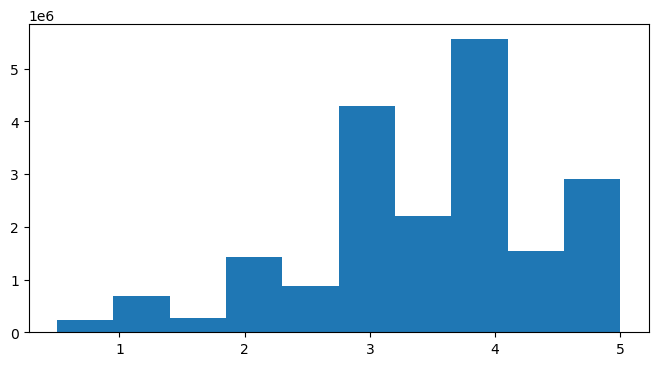

In [17]:
plt.hist(rating1['rating'])
plt.show()

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

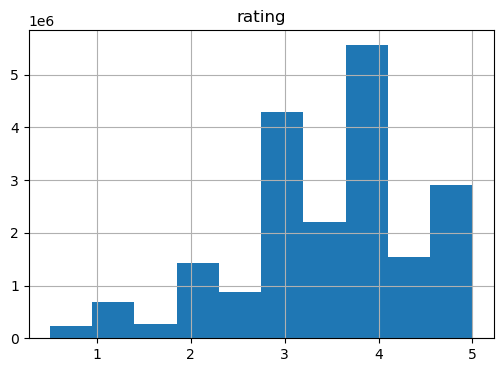

In [18]:
rating1.hist(column = 'rating', figsize= (6,4))

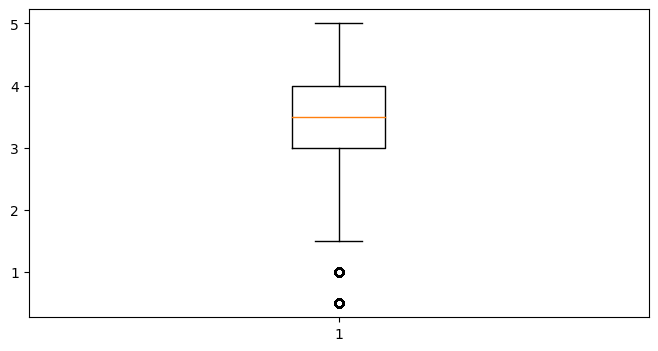

In [21]:
plt.boxplot([rating1['rating']])
plt.show()

<Axes: >

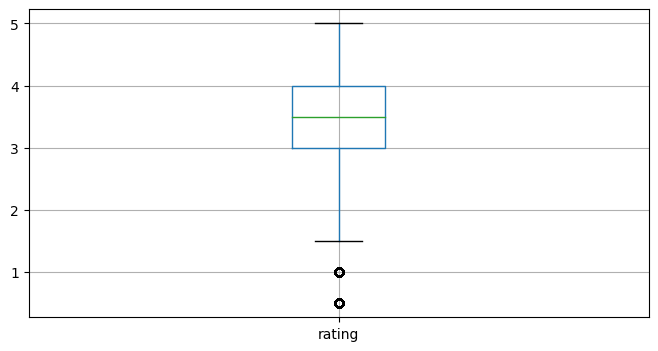

In [22]:
rating1.boxplot( column = 'rating')       # with grid

In [27]:
# slicing out column

movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [28]:
tag1['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [29]:
tag1[['userId','tag']].head()

,userId,tag
0,18,Mark Waters
1,65,dark hero
2,65,dark hero
3,65,noir thriller
4,65,dark hero


In [30]:
tag1.tail(10)

,userId,movieId,tag,Date
465554,138446,3489,visually appealing,2013-01-23
465555,138446,7045,family friendly,2013-01-23
465556,138446,7045,Scary Movies To See on Halloween,2013-01-23
465557,138446,7164,Peter Pan,2013-01-23
465558,138446,7164,visually appealing,2013-01-23
465559,138446,55999,dragged,2013-01-23
465560,138446,55999,Jason Bateman,2013-01-23
465561,138446,55999,quirky,2013-01-23
465562,138446,55999,sad,2013-01-23
465563,138472,923,rise to power,2007-11-02


In [31]:
rating1[-10:]         # last ten argument

,userId,movieId,rating,Date
20000253,138493,60816,4.5,2009-12-03
20000254,138493,61160,4.0,2009-11-16
20000255,138493,65682,4.5,2009-10-17
20000256,138493,66762,4.5,2009-10-17
20000257,138493,68319,4.5,2009-12-07
20000258,138493,68954,4.5,2009-11-13
20000259,138493,69526,4.5,2009-12-03
20000260,138493,69644,3.0,2009-12-07
20000261,138493,70286,5.0,2009-11-13
20000262,138493,71619,2.5,2009-10-17


In [32]:
rating1.tail(10)    # same output above

,userId,movieId,rating,Date
20000253,138493,60816,4.5,2009-12-03
20000254,138493,61160,4.0,2009-11-16
20000255,138493,65682,4.5,2009-10-17
20000256,138493,66762,4.5,2009-10-17
20000257,138493,68319,4.5,2009-12-07
20000258,138493,68954,4.5,2009-11-13
20000259,138493,69526,4.5,2009-12-03
20000260,138493,69644,3.0,2009-12-07
20000261,138493,70286,5.0,2009-11-13
20000262,138493,71619,2.5,2009-10-17


In [33]:
tag1['tag'].tail(10)

465554                  visually appealing
465555                     family friendly
465556    Scary Movies To See on Halloween
465557                           Peter Pan
465558                  visually appealing
465559                             dragged
465560                       Jason Bateman
465561                              quirky
465562                                 sad
465563                       rise to power
Name: tag, dtype: object

In [45]:
tag_counts = tag1['tag'].value_counts()         # count the  unique frequency

In [47]:
tag_counts

sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: tag, Length: 38643, dtype: int64

In [50]:
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

<Axes: >

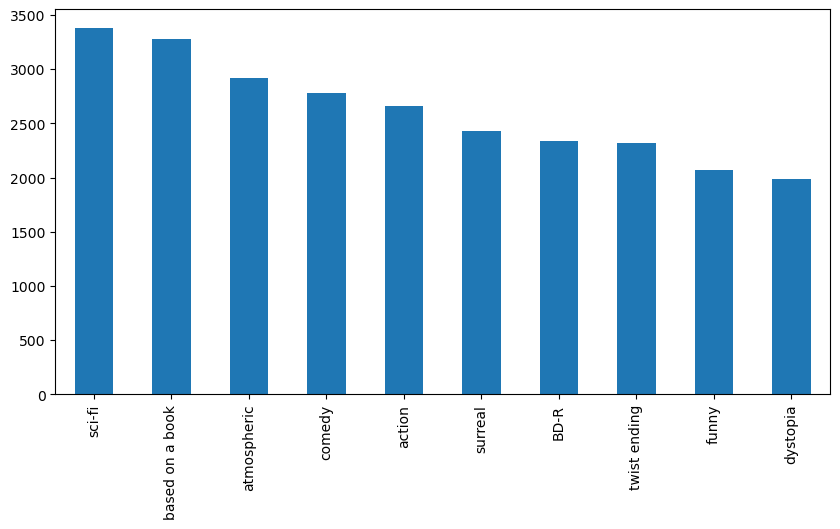

In [51]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))